# Lanczos polynomial vs uniform polynomial

Demonstrate how Lanczos polynomial is more accurate on *eigenvalues* at the cost of being less accurate over the entire interval

In [1]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib as mpl

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
n = 10
lam = np.zeros(n)
lam[:n-1] = np.linspace(0,1,n-1)
lam[-1] = 5

b = np.ones(n)#np.random.randn(n).astype(np.longdouble)

In [4]:
B = np.ones(n)

W = B*(b)**2 # w_i = <u_i,b>

b /= np.sqrt( b*B@b )

def f(x):
    return np.exp(-x)

A = lam
fAb = f(A)*b

In [5]:
k = 5

Q,(a_,b_) = exact_lanczos(A,b,k+1)
theta = sp.linalg.eigvalsh_tridiagonal(a_[:k+1],b_[:k],tol=1e-30)

p_lanc = lanczos_poly_approx(f,A,b,k)

L = np.array([[0,5]],dtype=np.float)
max_iter = 50
X0_unif = get_cheb_nodes(np.min(L),np.max(L),k+2)
p_unif,X_unif,lb_unif,ub_unif = remez(f,X0_unif,L,max_iter,rtol=1e-15)

L = np.array([[0,1],[5,5]],dtype=np.float)
max_iter = 50
X0_union = get_cheb_nodes(0,1,k+2)
p_union,X_union,lb_union,ub_union = remez(f,X0_union,L,max_iter,rtol=1e-15)

terminating at iteration 10 due to small decrease in error
terminating at iteration 9 due to small decrease in error


In [6]:
def objective(z):
    L = np.array([[0,1],[z,z],[5,5]],dtype=np.float)
    max_iter = 50
    X0_union1 = get_cheb_nodes(0,1,k+2)
    p_union1,X_union1,lb,ub = remez(f,X0_union1,L,max_iter,rtol=1e-15,verbose=0)
    
    return -ub

In [7]:
xx = np.linspace(4.95,4.975,100)
err = [-objective(z) for z in xx]

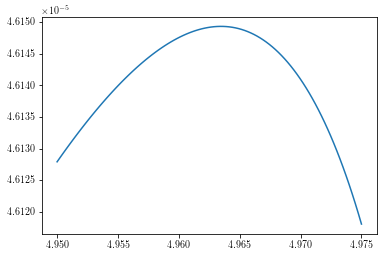

In [8]:
plt.plot(xx,err)

In [9]:
sol = sp.optimize.minimize_scalar(objective,bracket=[1,4,5],method='golden',tol=1e-7)
sol.x

4.963450091022869

In [10]:
L = np.array([[0,1],[sol.x,sol.x],[5,5]],dtype=np.float)
max_iter = 50
X0_union1 = get_cheb_nodes(0,1,k+2)
p_union1,X_union1,lb_union1,ub_union1 = remez(f,X0_union1,L,max_iter,rtol=1e-15)

terminating at iteration 8 due to small decrease in error


In [11]:
A_union = np.append(np.linspace(0,1,500-1),5)
b_union = np.ones(500)

p_opt_union = opt_poly_approx(f,A_union,b_union,4,B=np.ones(500))

In [12]:
A_unif = np.linspace(0,5,500)
b_unif = np.ones(500)

p_opt_unif = opt_poly_approx(f,A_unif,b_unif,4,B=np.ones(500))

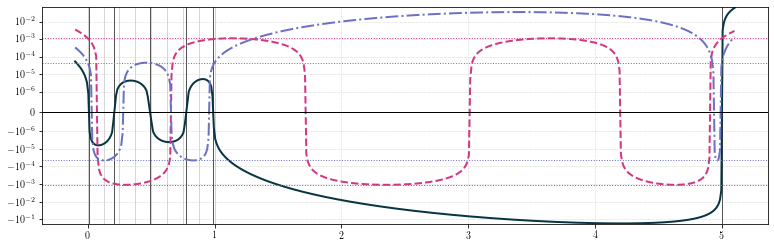

In [13]:
xx = np.linspace(np.min(L)-.1,np.max(L)+.1,500)

plt.figure(figsize=(13,4))
for l in lam:
    plt.axvline(l,color='#cccccc',linewidth=.8)
for l in theta:
    plt.axvline(l,color='#555555',linewidth=1)
    
#plt.plot(xx,0*xx,linestyle='-',color='#cbcbcb',linewidth='2')

plt.plot(xx,f(xx) - p_lanc(xx),linestyle='-',lw=2,color='#073642',label='Lanczos')

plt.plot(xx,f(xx) - p_unif(xx),linestyle='--',lw=2,color='#d33682')

#plt.plot(xx,f(xx) - p_union(xx),dashes=[2,3],color='#d33682',linewidth=3)
plt.plot(xx,f(xx) - p_union1(xx),linestyle='-.',lw=2,color='#6c71c4')

plt.axhline(ub_unif,ls=':',lw=1,color='#d33682')
plt.axhline(ub_union1,ls=':',lw=1,color='#6c71c4')
plt.axhline(-ub_unif,ls=':',lw=1,color='#d33682')
plt.axhline(-ub_union1,ls=':',lw=1,color='#6c71c4')

plt.axhline(0,lw=1,color='k')

#859900

#plt.plot(xx,f(xx) - p_opt(xx),linestyle='-',color='#6c71c4')


#plt.ylim(1.2*min(p_unif(lam)-f(lam)),1.2*max(p_unif(lam)-f(lam)))
#plt.ylim(10*min(p_unif(lam)-f(lam)),10*max(p_unif(lam)-f(lam)))


plt.grid(True,linestyle=':',linewidth=.5)

plt.yscale('symlog',linthreshy=1e-6)

#plt.title(f'error of degree {k} polynomial approximation to $f(x)=\exp(-x)$')
plt.savefig('imgs/lanc_poly_approx_diff.pdf',bbox_inches='tight')
plt.show()